# Importing the Libraries

In [44]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from tqdm.notebook import tqdm_notebook
import time
import matplotlib.pyplot as plt

In [11]:
df=pd.read_csv('train.csv')

In [12]:
df

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
...,...,...,...,...,...
20795,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...,0
20796,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...,0
20797,20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...,0
20798,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal...",1


In [13]:
new_df=df[['text','label']]

In [14]:
new_df

,text,label
0,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,Ever get the feeling your life circles the rou...,0
2,"Why the Truth Might Get You Fired October 29, ...",1
3,Videos 15 Civilians Killed In Single US Airstr...,1
4,Print \nAn Iranian woman has been sentenced to...,1
...,...,...
20795,Rapper T. I. unloaded on black celebrities who...,0
20796,When the Green Bay Packers lost to the Washing...,0
20797,The Macy’s of today grew from the union of sev...,0
20798,"NATO, Russia To Hold Parallel Exercises In Bal...",1


# Cleaning The DATASET

In [15]:
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

In [16]:
ps=PorterStemmer()

In [17]:
tqdm_notebook.pandas()
new_df['summary']=new_df['text'].apply(lambda x: re.sub('[^a-zA-Z]',' ',str(x)))
new_df['summary']=new_df['summary'].str.lower()
new_df['summary']=new_df['summary'].str.split()
new_df['summary']=new_df['summary'].progress_apply(lambda x:[ps.stem(word) for word in x if not word in stopwords.words('english')])
new_df['summary']=new_df['summary'].apply(lambda x: ' '.join(x))

<ipython-input-17-6e85cdfc03a3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['summary']=new_df['text'].apply(lambda x: re.sub('[^a-zA-Z]',' ',str(x)))
<ipython-input-17-6e85cdfc03a3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['summary']=new_df['summary'].str.lower()
<ipython-input-17-6e85cdfc03a3>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation:

  0%|          | 0/20800 [00:00<?, ?it/s]

<ipython-input-17-6e85cdfc03a3>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['summary']=new_df['summary'].progress_apply(lambda x:[ps.stem(word) for word in x if not word in stopwords.words('english')])
<ipython-input-17-6e85cdfc03a3>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['summary']=new_df['summary'].apply(lambda x: ' '.join(x))


In [18]:
new_df

,text,label,summary
0,House Dem Aide: We Didn’t Even See Comey’s Let...,1,hous dem aid even see comey letter jason chaff...
1,Ever get the feeling your life circles the rou...,0,ever get feel life circl roundabout rather hea...
2,"Why the Truth Might Get You Fired October 29, ...",1,truth might get fire octob tension intellig an...
3,Videos 15 Civilians Killed In Single US Airstr...,1,video civilian kill singl us airstrik identifi...
4,Print \nAn Iranian woman has been sentenced to...,1,print iranian woman sentenc six year prison ir...
...,...,...,...
20795,Rapper T. I. unloaded on black celebrities who...,0,rapper unload black celebr met donald trump el...
20796,When the Green Bay Packers lost to the Washing...,0,green bay packer lost washington redskin week ...
20797,The Macy’s of today grew from the union of sev...,0,maci today grew union sever great name america...
20798,"NATO, Russia To Hold Parallel Exercises In Bal...",1,nato russia hold parallel exercis balkan press...


In [143]:
X=new_df['summary'].values
y=new_df['label'].values

# Approach 1: Using CountVectorizer

In [144]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

In [145]:
X1=cv.fit_transform(X)

In [146]:
print(X1)

  (0, 43806)	6
  (0, 23700)	2
  (0, 1870)	5
  (0, 31125)	4
  (0, 86453)	3
  (0, 18947)	10
  (0, 55291)	7
  (0, 48287)	5
  (0, 16168)	14
  (0, 100055)	5
  (0, 22668)	5
  (0, 57198)	2
  (0, 69116)	2
  (0, 93327)	1
  (0, 93111)	1
  (0, 3353)	1
  (0, 34391)	1
  (0, 102455)	2
  (0, 45245)	1
  (0, 20761)	2
  (0, 61642)	1
  (0, 49216)	1
  (0, 6904)	1
  (0, 21055)	1
  (0, 19043)	1
  :	:
  (20799, 107985)	1
  (20799, 105803)	1
  (20799, 104292)	1
  (20799, 88137)	1
  (20799, 47649)	2
  (20799, 107314)	1
  (20799, 39111)	1
  (20799, 77424)	1
  (20799, 50306)	1
  (20799, 34035)	3
  (20799, 69736)	1
  (20799, 107935)	1
  (20799, 92683)	1
  (20799, 107871)	1
  (20799, 22845)	5
  (20799, 105493)	3
  (20799, 809)	1
  (20799, 22820)	1
  (20799, 95105)	1
  (20799, 20696)	1
  (20799, 101928)	1
  (20799, 32004)	2
  (20799, 101118)	1
  (20799, 25228)	1
  (20799, 23286)	1


In [167]:
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=42)

In [168]:
from sklearn.linear_model import LogisticRegression
lr_model=LogisticRegression()

In [169]:
lr_model.fit(X_train,y_train)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [170]:
y_pred1=lr_model.predict(X_test)

In [171]:
logisticRegression_accuracy=accuracy_score(y_test,y_pred1)
print(logisticRegression_accuracy)

0.9490384615384615


In [172]:
from sklearn.tree import DecisionTreeClassifier
dtc_model=DecisionTreeClassifier()

In [173]:
dtc_model.fit(X_train,y_train)

DecisionTreeClassifier()

In [174]:
y_pred1=dtc_model.predict(X_test)

In [175]:
Decisiontree_accuracy=accuracy_score(y_test,y_pred1)
print(Decisiontree_accuracy)

0.8896634615384615


In [176]:
from sklearn.ensemble  import RandomForestClassifier
Rf_model=RandomForestClassifier()

In [177]:
Rf_model.fit(X_train,y_train)


RandomForestClassifier()

In [178]:
y_pred1=Rf_model.predict(X_test)

In [179]:
RandomForrest_accuracy=accuracy_score(y_test,y_pred1)
print(RandomForrest_accuracy)

0.9067307692307692


In [180]:
dict={'Logistic_Regression':logisticRegression_accuracy,'Decision_Tree_Classifier':Decisiontree_accuracy,'Random_Forrest_Classifier':RandomForrest_accuracy}

([0, 1, 2], [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

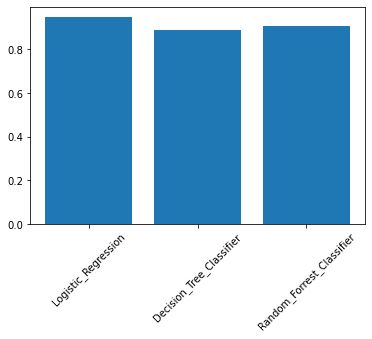

In [181]:
plt.bar(dict.keys(),dict.values())
plt.xticks(rotation=45)

# Approach 2: Using TF-IDF Vectorizer

In [182]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf=TfidfVectorizer()

In [183]:
X2=tf.fit_transform(X)

In [184]:
print(X2)

  (0, 108701)	0.05247338102196001
  (0, 60894)	0.04977522431614742
  (0, 14011)	0.022650199700101917
  (0, 18111)	0.02595356690739122
  (0, 31860)	0.019807643558105444
  (0, 19610)	0.041541061746287924
  (0, 22669)	0.052974718842920376
  (0, 34144)	0.013126964262377201
  (0, 65982)	0.041928694943766255
  (0, 59308)	0.02851413144837899
  (0, 97124)	0.01545573924537872
  (0, 517)	0.024551746105000903
  (0, 94179)	0.024262657710788473
  (0, 45777)	0.01879038027256228
  (0, 88866)	0.028440996916737207
  (0, 85365)	0.0292256336351807
  (0, 91927)	0.018001202950301432
  (0, 24365)	0.025521903922259743
  (0, 55511)	0.02086277670962608
  (0, 100755)	0.040639365493345306
  (0, 17279)	0.050334317477421654
  (0, 16406)	0.040937678019131604
  (0, 67145)	0.032772062041944196
  (0, 93405)	0.02747104277004444
  (0, 18734)	0.02211346117644084
  :	:
  (20799, 43872)	0.013959693951617893
  (20799, 95096)	0.04008258530809699
  (20799, 33384)	0.05242746778390489
  (20799, 58222)	0.013048403922102953
  (20

In [185]:
X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size=0.2, random_state=42)

In [192]:
from sklearn.linear_model import LogisticRegression
lr_model=LogisticRegression()
lr_model.fit(X_train,y_train)
y_pred2=lr_model.predict(X_test)
logisticRegression_accuracy=accuracy_score(y_test,y_pred2)
print(logisticRegression_accuracy)

0.9439903846153846


In [187]:
from sklearn.tree import DecisionTreeClassifier
dtc_model=DecisionTreeClassifier()
dtc_model.fit(X_train,y_train)
y_pred2=dtc_model.predict(X_test)
Decisiontree_accuracy=accuracy_score(y_test,y_pred2)
print(Decisiontree_accuracy)

0.88125


In [188]:
from sklearn.ensemble import RandomForestClassifier
Rf_model=RandomForestClassifier()
Rf_model.fit(X_train,y_train)
y_pred2=Rf_model.predict(X_test)
RandomForrest_accuracy=accuracy_score(y_test,y_pred2)
print(RandomForrest_accuracy)

0.9163461538461538


In [189]:
dict={'Logistic_Regression':logisticRegression_accuracy,'Decision_Tree_Classifier':Decisiontree_accuracy,'Random_Forest_Classifier':RandomForrest_accuracy}

Text(0.5, 1.0, 'Tf-IDF Vectorizer')

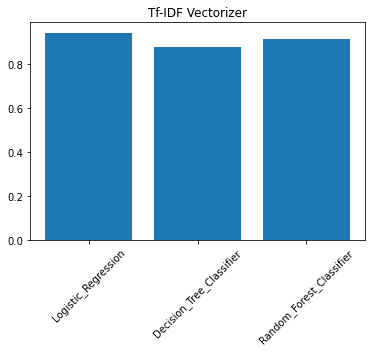

In [190]:
plt.bar(dict.keys(),dict.values())
plt.xticks(rotation=45);
plt.title('Tf-IDF Vectorizer')

# We see that both that both the approach's CountVectorizer and TF-IDF Vectorizer both performed equally well.